In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=True; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click aqui para ver o no el codigo on/off "></form>''')


In [2]:
# !pip install patool
# !pip install missingno
# !pip install ipywidgets

In [3]:
# try:
#     import ipywidgets
#     print('Modulo ipywidgets instalado')
# except ImportError:
#     print("Módulo no ipywidgets instalado")
#     !pip install ipywidgets
    
# try:
#     import patool
#     print('Modulo patool instalado')
# except ImportError:
#     print("Módulo patool no instalado")
#     !pip install patool
    
# try:
#     import missingno
#     print('Modulo missingno instalado')
# except ImportError:
#     print("Módulo missingno no instalado")
#     !pip install missingno

In [4]:
# import ipywidgets as widgets
# from __future__ import print_function
from ipywidgets import interact, interactive, fixed

In [5]:
import os
import pandas as pd
import numpy as np
import glob
import patoolib
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import rmtree

**Instrucciones**
# **Parte 1** - Algunas librerías, funciones y principios de utilidad

Antes de iniciar el proyecto de Transformación de datos, es necesario presentarles ciertos elementos fundamentales a la hora de programar.

a. Refactorización y principio DRY: Dentro del mundo de la programación, la [**refactorización**](http://abcarticulos.info/article/cmo-refactorizar-cdigo-en-python-gua-para-principiantes) es un término fundamental, pues tiene relación con buenas prácticas a la hora de modificar y reducir el código fuente sin cambiar su comportamiento, proceso conocido informalmente como “limpiar el código”. Su objetivo es el mejorar la facilidad de comprensión del código o cambiar su estructura y diseño y eliminar código muerto, para facilitar el mantenimiento en el futuro.

En tal contexto, el concepto DRY toma importante relevancia. Acrónimo de “Don't Repeat Yourself” (No te repitas), DRY representa un filosofía de definición de procesos que promueve la reducción de la duplicación especialmente en computación. 

Según este principio toda "pieza de información" nunca debería ser duplicada debido a que la duplicación incrementa la dificultad en los cambios y evolución posterior, puede perjudicar la claridad y crear un espacio para posibles inconsistencias.

En este proyecto buscaremos implementar esta filosofía en los distintos pasos de su código, a través del uso de librerías adecuadas, ciclos y funciones. Contar con código refactorizado es siempre un gran plus en su trabajo, tanto por aspectos visuales que simplifican la lectura del código para otras personas, como también en aspectos de programación, simplificando también posibles modificaciones o usos del código, en menos líneas.

b. ´Funcionalidades y librerías para entorno de programación: Jupyter Notebook cuenta con varias librerías y funciones de soporte para simplificar y/o personalizar su uso. A continuación les dejamos unas cuantas herramientas que pueden resultarles de mucha utilidad: 

b1. Funcionalidades built-in de Jupyter Notebook:  Existen varias herramientas de conveniencia. Destacamos entre ellas los comandos “magic”, los cuales podemos distinguir fácilmente pues todos ellos inician con el símbolo “%”.
Para ver en detalle todas estas opciones, revisa este link
Cheatsheet de Jupyter Notebook, con comandos %magic incluidos.
Bonus: Jupyter magics con SQL

b2. Nbextensions: Así como Jupyter Notebook cuenta con funciones propias de mucha utilidad, también existen extensiones que complementan este entorno. Nbextensions es un ejemplo de de ello. Entre sus más de 60 funcionalidades se puede encontrar addins para “embellecer” y estandarizar el código utilizado, generar tablas de contenido similares a las existentes en Colab, agregar un contador del tiempo que tomó cada celda en ejecutarse o poder seleccionar ciertas celdas para reproducirlas todas de corrido, muy útil para notebooks de larga extensión donde nos interese correr muchas celdas de forma inicial, pero no todas ellas.

Instrucciones de instalación para Ubuntu Aquí.
Detalles sobre cada una de las funcionalidades Acá.
Para varias de aquellas funciones, requerirán también instalar la librería yapf.

1. Comente, a partir del punto b2, qué funcionalidades les llamaron la atención y por tanto instalaron en su entorno. Ya finalizado todo el proyecto, indique qué herramientas indicadas en b1 y b2 utilizó y de qué forma.


# **Parte 2** - Carga de Datos

En este proyecto deberán cargar los datos a partir de múltiples archivos csv, los cuales vendrán contenidos en un archivo .rar con su nombre_apellido. Este contendrá 50 archivos csv correspondiente a una región en particular que se les ha asignado, más otro archivo .rar llamado censo_chile_sample que contiene otros 50 archivos csv con un muestreo de 50.000 registros obtenidos de todo el país.

2. Investigue sobre el uso de la librería glob, para la lectura de múltiples archivos, y utilicela para la carga de datos. 
Hint: Podría serle de utilidad también el utilizar la librería os.


Metodos alternativos carga de datos(doble click)
<!--# Permite contatenar varios datasets en un solo
current_dir = os.path.dirname(os.path.realpath('Datasets\censo_11r_1.csv'))
file1 = os.path.join(current_dir,'censo_11r_1.csv')
data = pd.read_csv(file1,sep=';')
for i in range(2,51):
    filename= '\censo_11r_'+str(i)+'.csv'
    file2= current_dir+filename
    data_temp = pd.read_csv(file2,sep=';')
    data = pd.concat([data,data_temp])
-->

<!--demora como 5 min en mi notebook
def extract_compress(nombre_archivo):
    folder=patoolib.extract_archive(nombre_archivo)
    current_dir = os.path.dirname(os.path.realpath(folder))
    todos = glob.glob(current_dir+'\\'+folder+'\*')
    data = pd.DataFrame()
    for i in todos:
        dat = pd.read_csv(i,sep=';')
        data=data.append(dat,ignore_index=True)
        data.to_csv(nombre_archivo.replace('.rar','.csv'),index=False, sep=';') 
    return data
-->

Borra las carpetas creadas para que no duplique los datos

In [6]:
# Funcion para extraer archivos rar con CSV y unirlos en uno solo
def extract_compress(nombre_archivo):
    folder=patoolib.extract_archive(nombre_archivo)
    current_dir = os.path.dirname(os.path.realpath(folder))
    todos = glob.glob(current_dir+'\\'+folder+'\*')
    data = pd.DataFrame()
    for i in todos:
        dat = pd.read_csv(i,sep=';')
        data=data.append(dat,ignore_index=True)
    return data

In [10]:
#Borra o crea los archivos para que no se dupliquen
try: 
    rmtree("11r_cristian_peschke")
    rmtree("censo_chile_sample")
    print('Los archivos se han borrado, vuelva a ejecutar para crearlos')
except FileNotFoundError:
    print('Loa Archivos se estan creando\n')
    censo_cristian_2017 = extract_compress('11r_cristian_peschke.rar')
    censo_chile_2017 = extract_compress('censo_chile_sample.rar')

Loa Archivos se estan creando

patool: Extracting 11r_cristian_peschke.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\Rolakun\Documents\Programas Python\Proyecto 10\11r_cristian_peschke.rar"
patool:     with cwd=.\Unpack_i3orjd2m
patool: ... 11r_cristian_peschke.rar extracted to `11r_cristian_peschke' (multiple files in root).
patool: Extracting censo_chile_sample.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\Rolakun\Documents\Programas Python\Proyecto 10\censo_chile_sample.rar"
patool:     with cwd=.\Unpack_9vw87_yp
patool: ... censo_chile_sample.rar extracted to `censo_chile_sample' (multiple files in root).


In [11]:
# censo_cristian_2017 = extract_compress('11r_cristian_peschke.rar')
# censo_chile_2017 = extract_compress('censo_chile_sample.rar')

In [12]:
censo_cristian_2017.drop(columns='Unnamed: 0',inplace=True)
censo_chile_2017.drop(columns='Unnamed: 0',inplace=True)


# **Parte 3** - Preprocesamiento y transformación de datos

##  Para el archivo de datos asignados realice una identificación de los datos nulos. Además, explique el tratamiento de estos detalladamente.
Esto quiere decir, en caso de que tome la determinación de mantener, eliminar o imputar estos datos, indique el procedimiento que utilizó y el porqué de su decisión.
Indique el tamaño del DataFrame previo y posterior a la realización de este punto.

Hint: utilice el pdf adjunto al anunciado para identificar los valores utilizados para indicar qué datos están asignados como ‘missing’ o ‘no aplica’. Recuerde que no siempre los datos NaN vienen ya codificados como tales en una base de datos.



In [13]:
#Funciones para trata de datos nulos o vacios por columna
def cambiar_a_nulos(df):
    for col in df:
        if df[col].dtypes != 'O':
            df[col].replace([99,999,9999],np.nan,inplace=True)
        elif df[col].dtypes =='O':
            df[col].replace(['99','999','9999'],np.nan,inplace=True)
        else:
            pass
#funcion que entrega total de nulos y su equivalencia en %
def mostrar_nulos(df):
    tnulos = df.isnull().sum()
    tdatoscol = df.count()
    porcentnull = ((tnulos/len(df))*100)
    nom_columnas = df.columns.to_list()
    data_datos = pd.DataFrame({'Columnas':nom_columnas,'Datos no nulos':tdatoscol,'Nulos':tnulos,'% Nulos':porcentnull}).reset_index(drop=True)
    %matplotlib inline
    missing=msno.matrix(df)
    return display(data_datos,missing);

def llenar_nulos(df)   :
    for col in df:
        a= df[col][df[col].isnull()==True]
        lista= df[col].value_counts().keys().to_list()
        norm = np.random.choice(lista,len(a),p=df[col].value_counts('%').to_list())
        df.loc[a.index,col]=norm
        
# def outliers_por_nan(df):
#     nomcol=df._get_numeric_data()#.columns
#     numlist = [99,2,999,16053,4296,36,9999,19,2,100,
#                98,15202,998,98,15202,998,98,15202,998,
#                9998, 
#                98,98,98,98,98,98,98,98,98, 
#                98,98,98,2017,998,998,998,98,98, 
#                15,152,15202,15202,15202,15202]
#     n=0
#     for col in nomcol:
#         nomcol[col]=nomcol[col].where(~(nomcol[col]>numlist[n]),np.nan)
#         n+=1

def outliers_por_nan(df):
    nomcol=df._get_numeric_data()
    for col in nomcol:
        nomcol[col]=nomcol[col].where(~(nomcol[col]>=99999),np.nan)

## **BBDD censo_cristian_2017**

Al analizar, la base de datos mediante el pdf que se nos adjunto, nos damos cuenta que no se puede realizar el mismo trato a todas las columnas, ya que algunas columnas especifican los valores perdidos 'Missing' con 99, 999 y 9999 pero otras contienen datos 99 como para la columna Area o P09 que se refiere a la edad 99 años, y otras nisiquera contienen estos valores. 

* **paso 1)** Asi que lo primero que hare, sera usar una funcion que programe **mostrar_nulos()** para ver como estan distribuidos los datos vacios.

* **paso 2)** Luego separare con .loc las columnas que que contienen los datos 99, 999, 9999 como missing y aplicare la funcion **cambiar_a_nulos** para que queden vacios. 

* **paso 3)** Por ultimo, considerando el peso de todo dato nulo o perdido en la BBDD, se tratará llenandolos con los mismos datos que contiene la columna tomando en cuenta el porcentaje de repeticion de los datos, para eso se usara **np.random.choice** la cual esta en la funcion **cambiar_nulos** para generar una lista para cada columna y reemplazar los valores vacios.

### **Paso 1)** Mostrar nulos

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,49879,121,0.242
1,AREA,49888,112,0.224
2,ZC_LOC,49889,111,0.222
3,ID_ZONA_LOC,49882,118,0.236
4,NVIV,49883,117,0.234
5,NHOGAR,49880,120,0.240
6,PERSONAN,49865,135,0.270
7,P07,49862,138,0.276
8,P08,49870,130,0.260
9,P09,49873,127,0.254


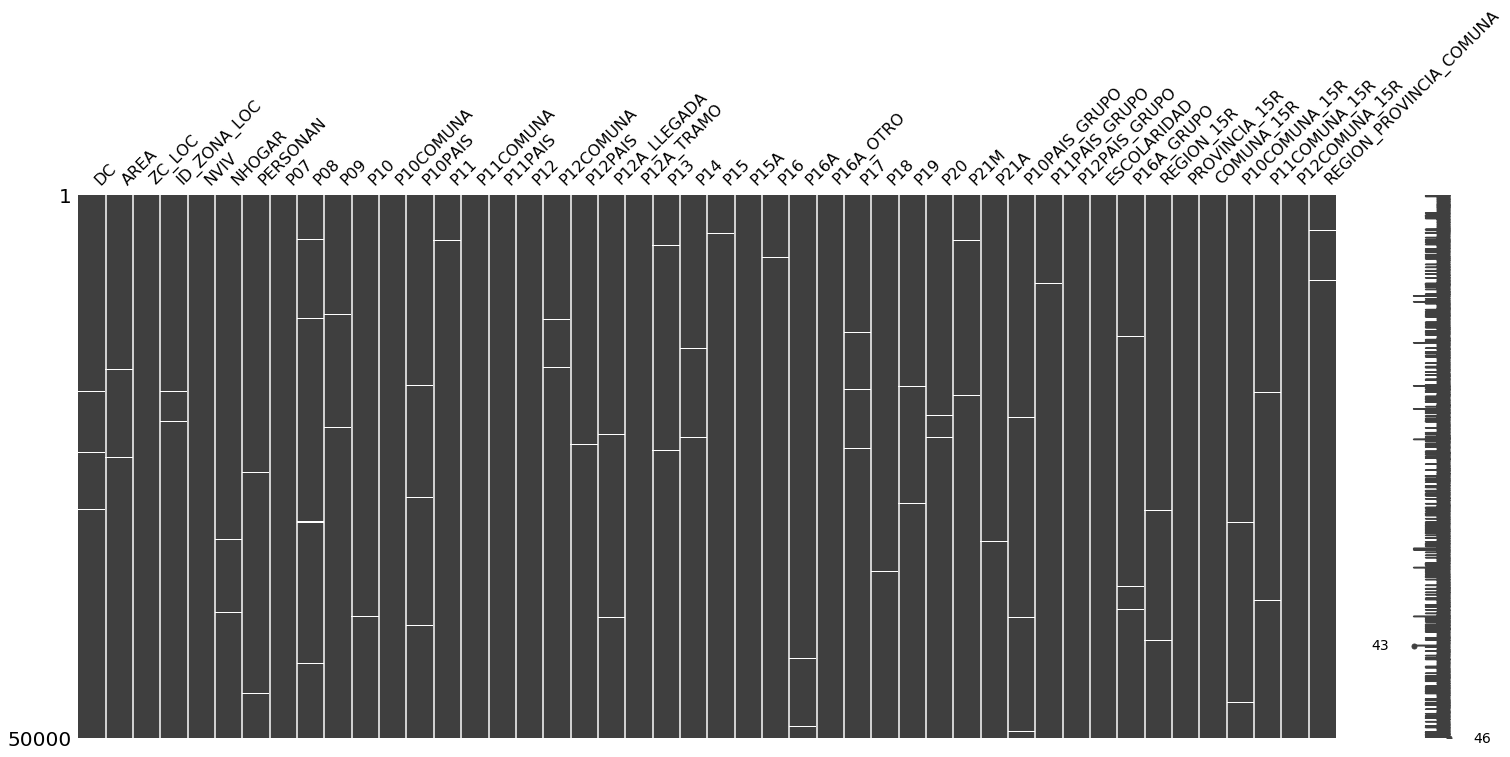

In [14]:
mostrar_nulos(censo_cristian_2017)

### **Paso 2)** Luego separare con .loc las columnas que que contienen los datos 99, 999, 9999 como missing

In [15]:
# Columnas que tienen datos nulos tratados como 99, 999 y 9999 como 'missing' 
# y cuales cambiaremos a nulos.
cambiaranull = censo_cristian_2017.loc[:,'P10':'P16A_GRUPO']
cambiar_a_nulos(cambiaranull)
censo_cristian_2017.loc[:,'P10':'P16A_GRUPO']=cambiaranull

### **Paso 3)** Llenar los datos nulos o vacios

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,50000,0,0.0
1,AREA,50000,0,0.0
2,ZC_LOC,50000,0,0.0
3,ID_ZONA_LOC,50000,0,0.0
4,NVIV,50000,0,0.0
5,NHOGAR,50000,0,0.0
6,PERSONAN,50000,0,0.0
7,P07,50000,0,0.0
8,P08,50000,0,0.0
9,P09,50000,0,0.0


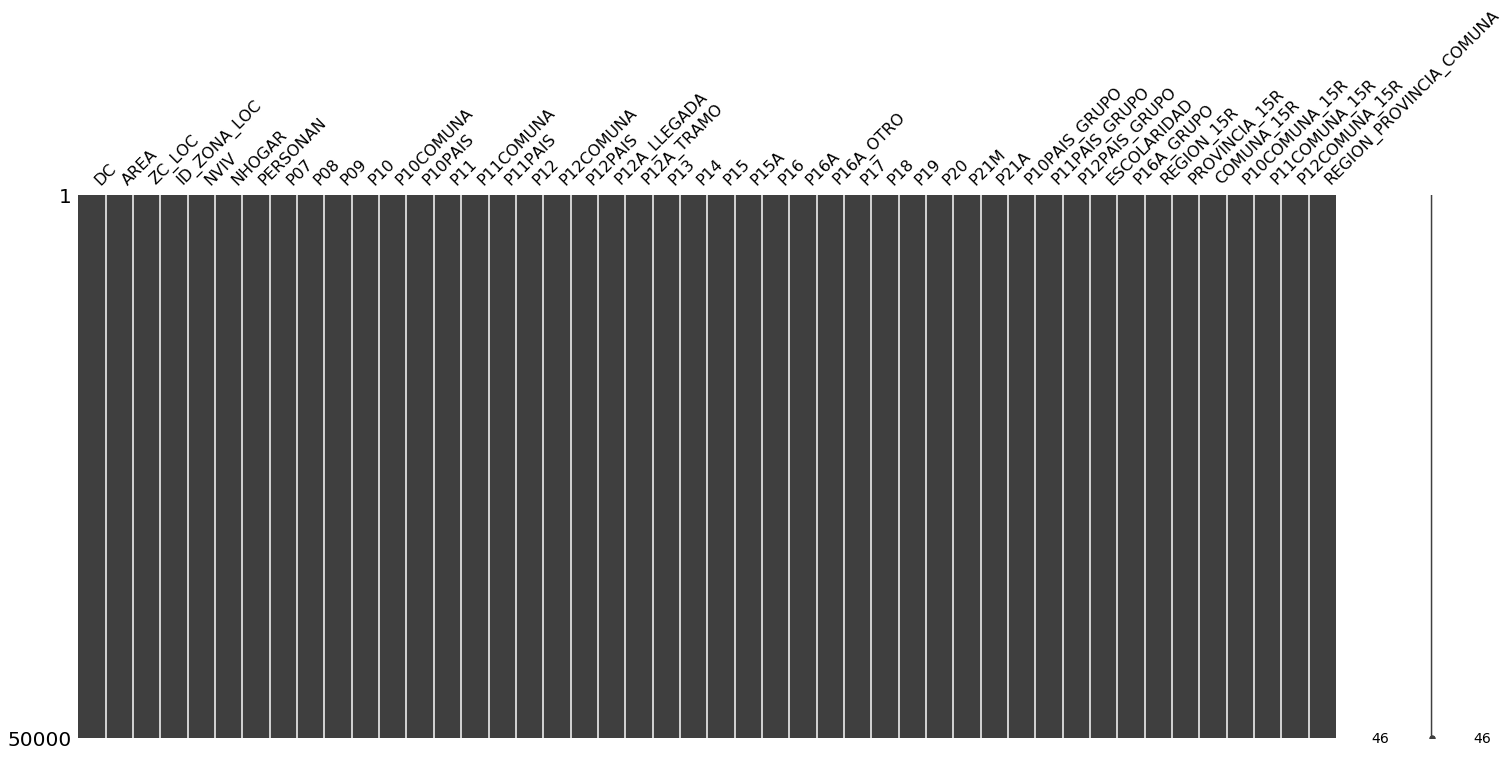

In [16]:
llenar_nulos(censo_cristian_2017)
mostrar_nulos(censo_cristian_2017)

## **BBDD censo_chile_2017**

Aplicaremos los mismos 3 pasos anteriores

### **Paso 1)** Mostrar nulos

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,49891,109,0.218
1,AREA,49881,119,0.238
2,ZC_LOC,49897,103,0.206
3,ID_ZONA_LOC,49895,105,0.210
4,NVIV,49879,121,0.242
5,NHOGAR,49873,127,0.254
6,PERSONAN,49881,119,0.238
7,P07,49883,117,0.234
8,P08,49894,106,0.212
9,P09,49856,144,0.288


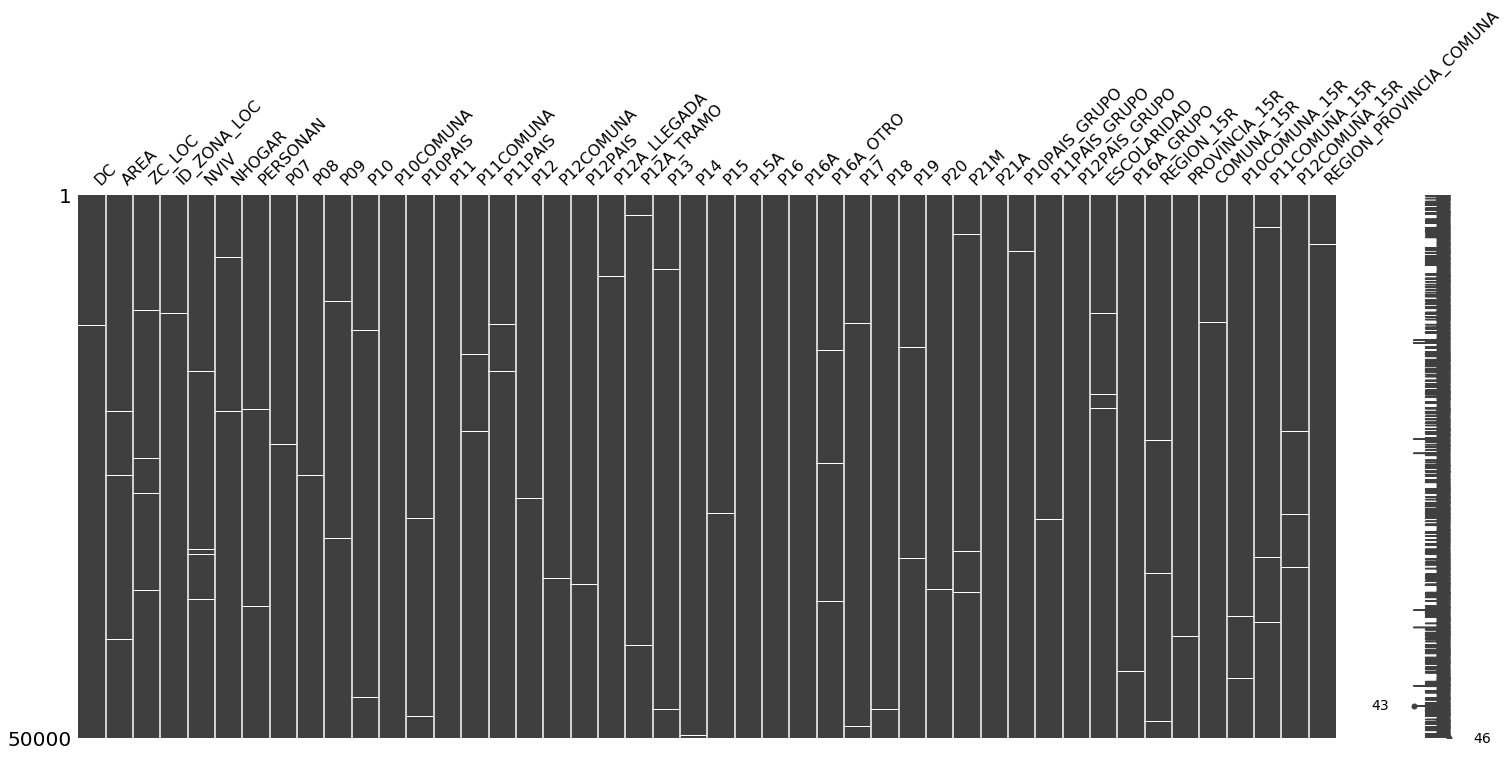

In [17]:
mostrar_nulos(censo_chile_2017)

### **Paso 2)** Luego separare con .loc las columnas que que contienen los datos 99, 999, 9999 como missing

In [18]:
# Columnas que tienen datos nulos tratados como 99, 999 y 9999 como 'missing' 
# y cuales cambiaremos a nulos.
cambiaranull = censo_chile_2017.loc[:,'P10':'P16A_GRUPO']
cambiar_a_nulos(cambiaranull)
censo_chile_2017.loc[:,'P10':'P16A_GRUPO']=cambiaranull

### **Paso 3)** Llenar los datos nulos o vacios

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,50000,0,0.0
1,AREA,50000,0,0.0
2,ZC_LOC,50000,0,0.0
3,ID_ZONA_LOC,50000,0,0.0
4,NVIV,50000,0,0.0
5,NHOGAR,50000,0,0.0
6,PERSONAN,50000,0,0.0
7,P07,50000,0,0.0
8,P08,50000,0,0.0
9,P09,50000,0,0.0


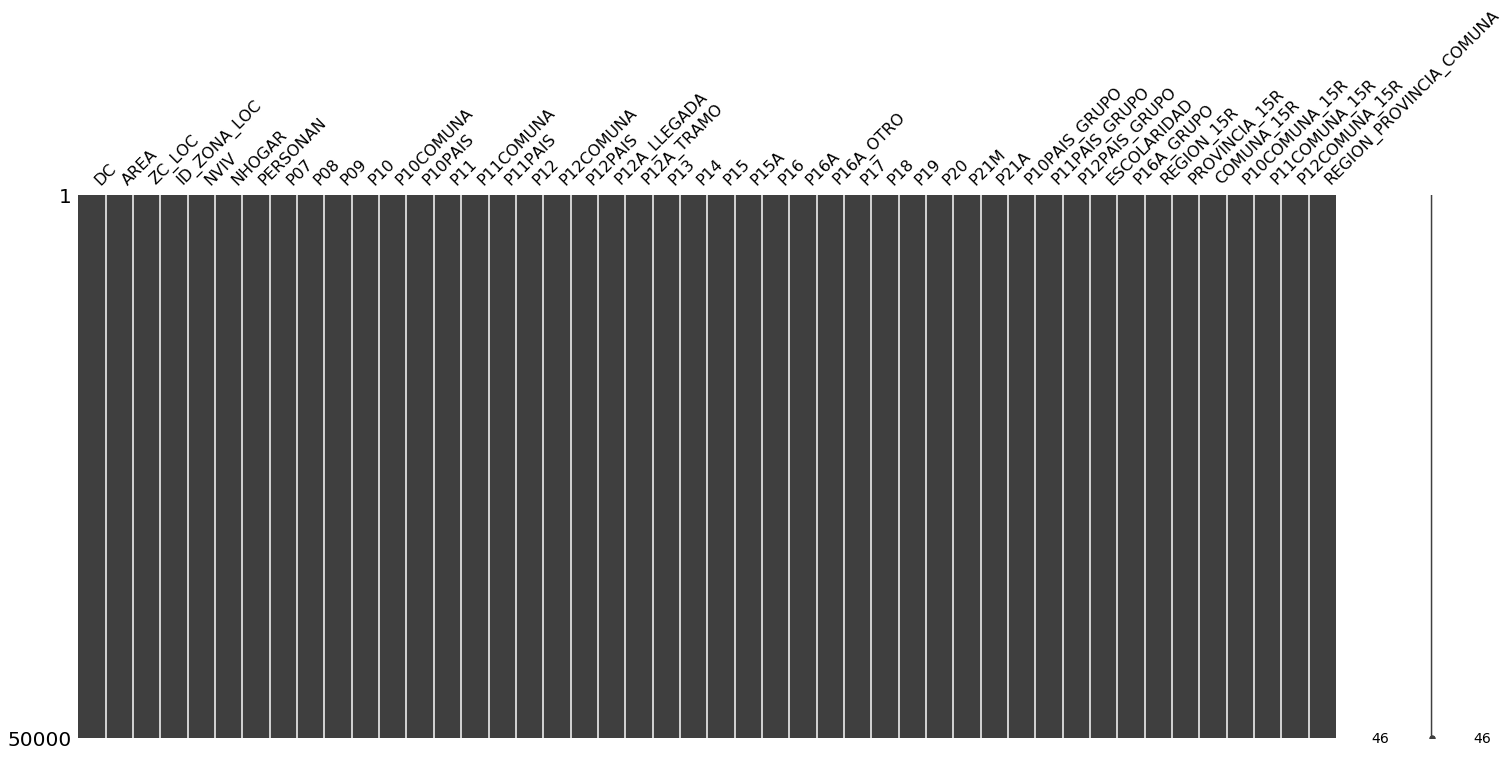

In [19]:
llenar_nulos(censo_chile_2017)
mostrar_nulos(censo_chile_2017)

## **Realice la identificación de datos anómalos u outliers.**
Al igual que el punto anterior, debe detallar todo el tratamiento el cual explique el porque identifica esos valores como outliers, el procedimiento de identificación (que técnicas utilizó) y qué hará con ellos (se mantienen, se eliminan o se imputan).

Indique el tamaño del DataFrame previo y posterior a la realización de este punto.


Para tratar esta parte, debemos comprender como estan distribuidos los datos. Existen columnas en el cual, segun lo que dice el pdf adjunto, estan en un rango de 1-2, 1-99, 0-999, 1-9999, me percate que los outliers son todos los datos mayores a 100000, asi que para asegurar, cambiare todo dato outlier a 'nan' asi despues los llenare igual al **Paso 3** del item anterior.

In [20]:
for col in censo_cristian_2017:
    print(censo_cristian_2017[col].value_counts())

1.0          15090
12.0         10846
13.0          9627
4.0           4843
2.0           2945
7.0           1869
6.0           1149
5.0            983
11.0           920
3.0            587
10.0           548
99.0           480
9.0             82
1820000.0        3
8.0              3
1560000.0        3
400000.0         2
120000.0         2
110000.0         2
910000.0         1
2080000.0        1
1320000.0        1
1800000.0        1
1200000.0        1
320000.0         1
150000.0         1
280000.0         1
2470000.0        1
1760000.0        1
1430000.0        1
1920000.0        1
140000.0         1
640000.0         1
900000.0         1
2340000.0        1
Name: DC, dtype: int64
1.0         39816
2.0         10138
120000.0        7
160000.0        6
170000.0        6
140000.0        5
100000.0        5
180000.0        3
190000.0        3
110000.0        3
150000.0        2
130000.0        1
200000.0        1
300000.0        1
340000.0        1
220000.0        1
320000.0        1
Name: 

Name: P14, dtype: int64
5.0           16071
7.0           11662
12.0           5770
8.0            5159
11.0           3057
98.0           2202
1.0            1849
3.0            1174
6.0            1018
2.0             823
9.0             467
13.0            370
4.0             168
10.0            132
14.0             53
1260000.0         3
770000.0          2
650000.0          2
1320000.0         1
1190000.0         1
12740000.0        1
800000.0          1
850000.0          1
500000.0          1
10780000.0        1
550000.0          1
15680000.0        1
880000.0          1
750000.0          1
1120000.0         1
2040000.0         1
120000.0          1
700000.0          1
1800000.0         1
1400000.0         1
2470000.0         1
Name: P15, dtype: int64
1.0         26309
2.0         21448
98.0         2221
140000.0        3
220000.0        3
150000.0        3
360000.0        2
260000.0        2
240000.0        2
130000.0        1
280000.0        1
320000.0        1
180000.0        

Name: COMUNA_15R, dtype: int64
9.800000e+01    46449
9.900000e+01      477
1.110100e+04      360
1.010100e+04      221
1.120100e+04      156
1.310100e+04      123
1.030100e+04       91
1.140100e+04       81
1.010200e+04       76
1.120200e+04       75
9.101000e+03       65
1.340100e+04       63
1.410100e+04       59
1.020200e+04       59
1.130100e+04       56
1.010800e+04       54
1.140200e+04       47
1.020800e+04       46
9.970000e+02       45
1.020100e+04       37
8.101000e+03       37
1.210100e+04       33
1.310500e+04       32
5.109000e+03       30
1.311200e+04       29
1.311000e+04       29
1.320100e+04       28
1.040300e+04       25
5.101000e+03       25
8.401000e+03       21
                ...  
8.205000e+03        1
9.207000e+03        1
9.209000e+03        1
2.302000e+03        1
6.108000e+03        1
1.312700e+04        1
1.360300e+04        1
1.312900e+04        1
1.360500e+04        1
1.633280e+09        1
9.115000e+03        1
6.304000e+03        1
1.360200e+04        1
5

### Outliers Datasets censo_cristian_2017

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,49972,28,0.056
1,AREA,49954,46,0.092
2,ZC_LOC,49977,23,0.046
3,ID_ZONA_LOC,49975,25,0.050
4,NVIV,49975,25,0.050
5,NHOGAR,49970,30,0.060
6,PERSONAN,49971,29,0.058
7,P07,49981,19,0.038
8,P08,49972,28,0.056
9,P09,49972,28,0.056


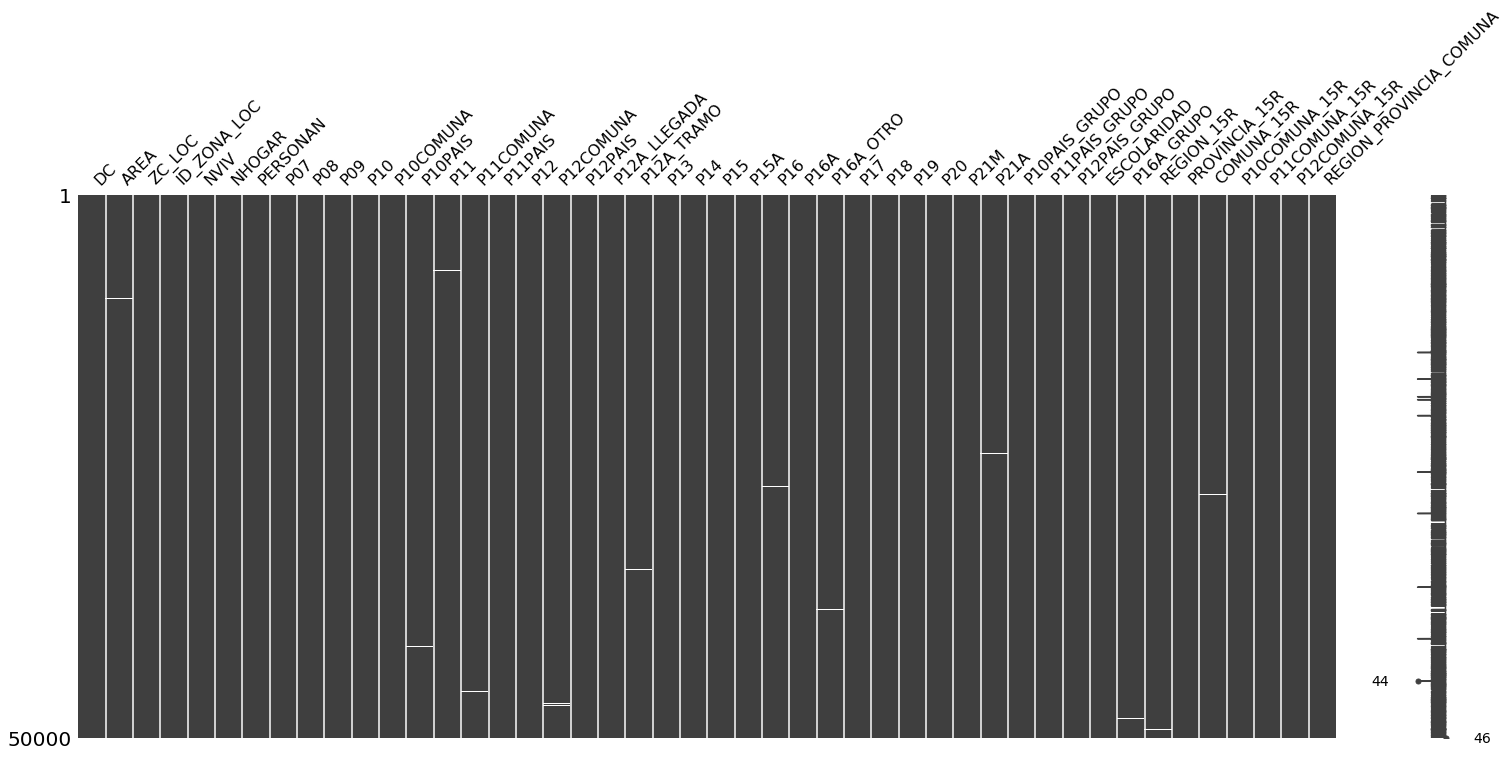

In [21]:
outliers_por_nan(censo_cristian_2017)
mostrar_nulos(censo_cristian_2017)

Llenar nulos como en el item anterior, **Paso 3**

In [22]:
llenar_nulos(censo_cristian_2017)

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,50000,0,0.0
1,AREA,50000,0,0.0
2,ZC_LOC,50000,0,0.0
3,ID_ZONA_LOC,50000,0,0.0
4,NVIV,50000,0,0.0
5,NHOGAR,50000,0,0.0
6,PERSONAN,50000,0,0.0
7,P07,50000,0,0.0
8,P08,50000,0,0.0
9,P09,50000,0,0.0


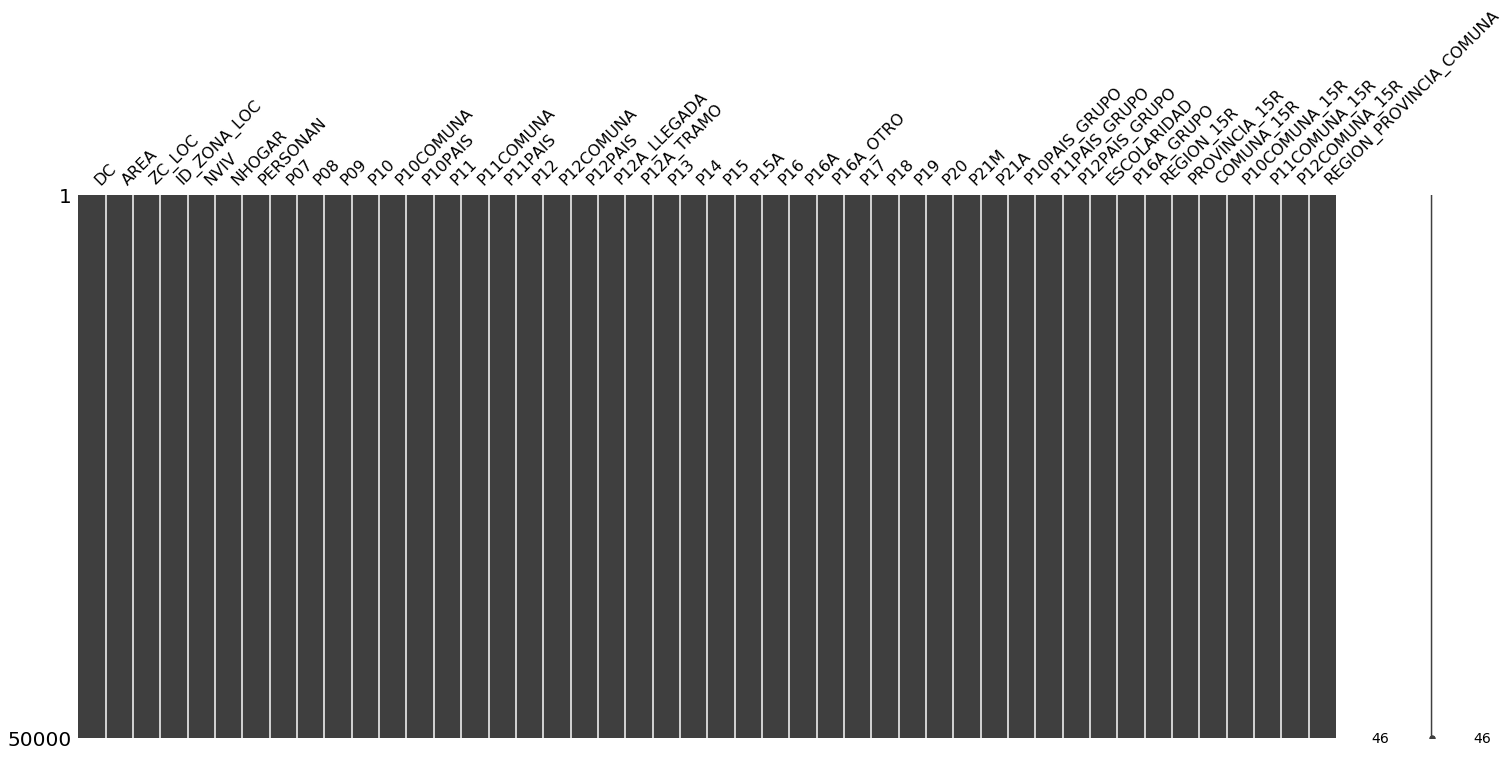

In [23]:
mostrar_nulos(censo_cristian_2017)

### Outliers Datasets censo_chile_2017

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,49966,34,0.068
1,AREA,49970,30,0.060
2,ZC_LOC,49971,29,0.058
3,ID_ZONA_LOC,49976,24,0.048
4,NVIV,49978,22,0.044
5,NHOGAR,49977,23,0.046
6,PERSONAN,49983,17,0.034
7,P07,49975,25,0.050
8,P08,49975,25,0.050
9,P09,49978,22,0.044


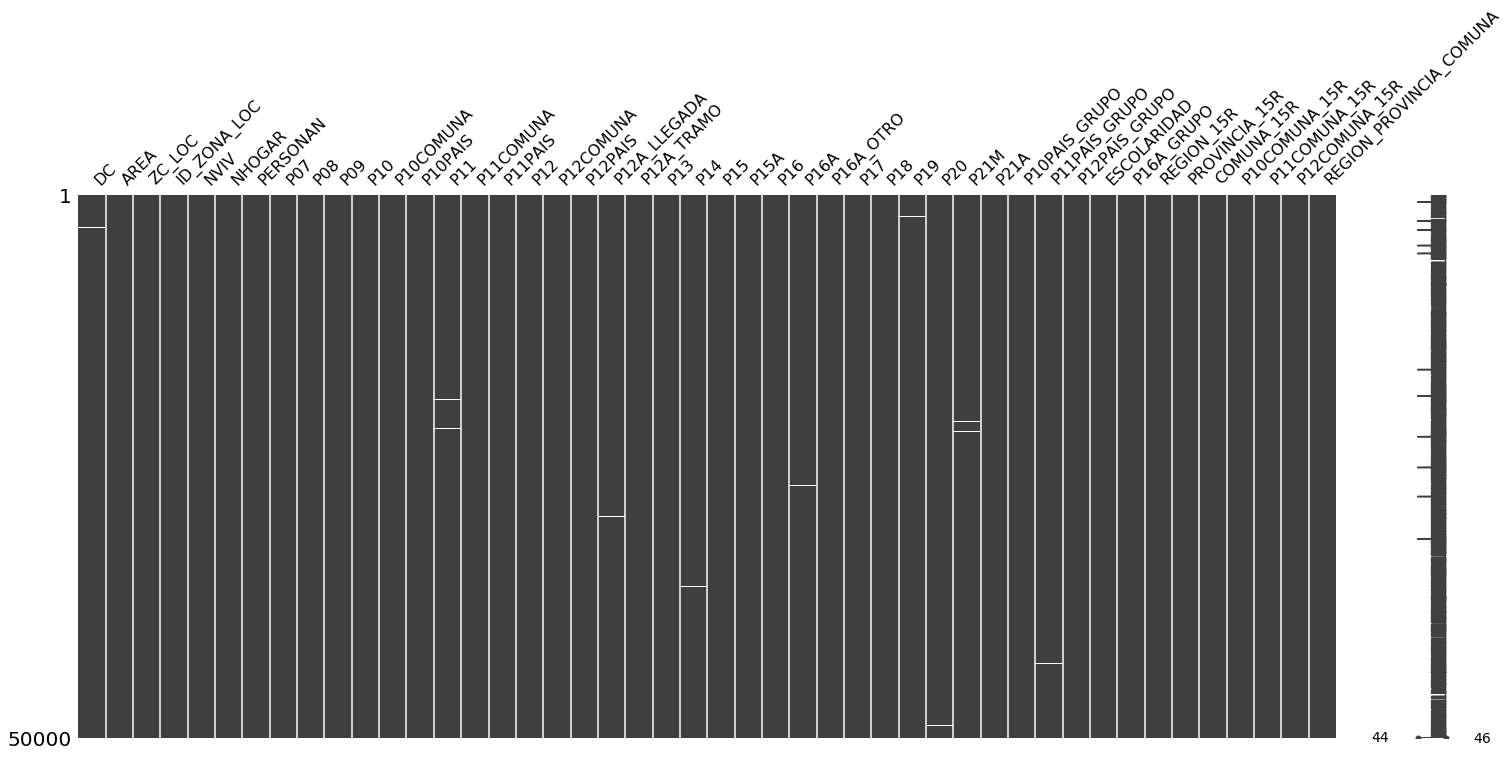

In [24]:
outliers_por_nan(censo_chile_2017)
mostrar_nulos(censo_chile_2017)

Llenar nulos como en el item anterior, **Paso 3**

In [25]:
llenar_nulos(censo_chile_2017)

,Columnas,Datos no nulos,Nulos,% Nulos
0,DC,50000,0,0.0
1,AREA,50000,0,0.0
2,ZC_LOC,50000,0,0.0
3,ID_ZONA_LOC,50000,0,0.0
4,NVIV,50000,0,0.0
5,NHOGAR,50000,0,0.0
6,PERSONAN,50000,0,0.0
7,P07,50000,0,0.0
8,P08,50000,0,0.0
9,P09,50000,0,0.0


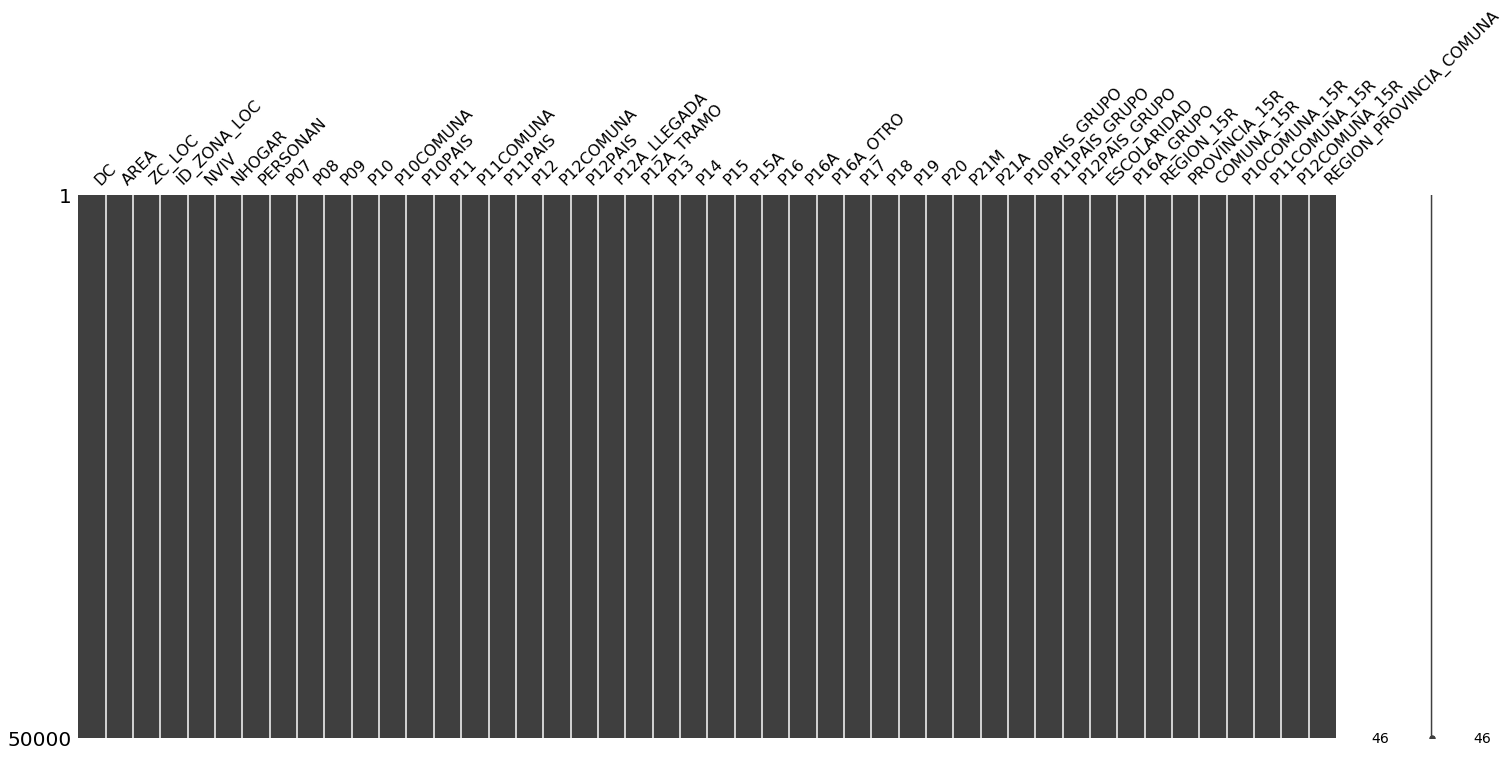

In [26]:
mostrar_nulos(censo_chile_2017)

## **Procese las columnas que contengan más de una variable en sus registros.**
Indique qué columnas son y qué variables contiene. Sepárelas indicando paso a paso cuál fue el proceso que utilizó para la limpieza de estas variables.



Al analizar la BBDD me percate que hay una columna que contiene 3 variables en una, esta es la columna 'REGION_PROVINCIA_COMUNA'. Asi que usaré 'str.plit' para separar las variables en las columnas necesarias.

Como esto se hará para 2 datasets, usare una funcion para no repetir codigo

In [27]:
def sep_columnas(df,col):
    print(df[col].head(1))
    print("\nEn la columna se observa que tiene como separador el caracter '_' el cual usaremos para separar las 3 variables que se encuentran ahí.")
    columnas=df[col].str.split('_',2, expand=True).rename(columns={0:'REGION',1:'PROVINCIA',2:'COMUNA'})
    print(columnas.columns)
    print("\nVamos a concatenar las 3 nuevas columnas y eliminar con 'drop' la columna 'REGION_PROVINCIA_COMUNA'")
    df = pd.concat([df,columnas],axis=1).drop(columns=col)
    return df


In [28]:
censo_cristian_2017 = sep_columnas(censo_cristian_2017,'REGION_PROVINCIA_COMUNA')

0    11_111_11101
Name: REGION_PROVINCIA_COMUNA, dtype: object

En la columna se observa que tiene como separador el caracter '_' el cual usaremos para separar las 3 variables que se encuentran ahí.
Index(['REGION', 'PROVINCIA', 'COMUNA'], dtype='object')

Vamos a concatenar las 3 nuevas columnas y eliminar con 'drop' la columna 'REGION_PROVINCIA_COMUNA'


In [29]:
censo_cristian_2017.columns

Index(['DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'NVIV', 'NHOGAR', 'PERSONAN',
       'P07', 'P08', 'P09', 'P10', 'P10COMUNA', 'P10PAIS', 'P11', 'P11COMUNA',
       'P11PAIS', 'P12', 'P12COMUNA', 'P12PAIS', 'P12A_LLEGADA', 'P12A_TRAMO',
       'P13', 'P14', 'P15', 'P15A', 'P16', 'P16A', 'P16A_OTRO', 'P17', 'P18',
       'P19', 'P20', 'P21M', 'P21A', 'P10PAIS_GRUPO', 'P11PAIS_GRUPO',
       'P12PAIS_GRUPO', 'ESCOLARIDAD', 'P16A_GRUPO', 'REGION_15R',
       'PROVINCIA_15R', 'COMUNA_15R', 'P10COMUNA_15R', 'P11COMUNA_15R',
       'P12COMUNA_15R', 'REGION', 'PROVINCIA', 'COMUNA'],
      dtype='object')

In [30]:

censo_chile_2017 = sep_columnas(censo_chile_2017,'REGION_PROVINCIA_COMUNA')

0    9_91_9112
Name: REGION_PROVINCIA_COMUNA, dtype: object

En la columna se observa que tiene como separador el caracter '_' el cual usaremos para separar las 3 variables que se encuentran ahí.
Index(['REGION', 'PROVINCIA', 'COMUNA'], dtype='object')

Vamos a concatenar las 3 nuevas columnas y eliminar con 'drop' la columna 'REGION_PROVINCIA_COMUNA'


In [31]:
censo_chile_2017.columns

Index(['DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC', 'NVIV', 'NHOGAR', 'PERSONAN',
       'P07', 'P08', 'P09', 'P10', 'P10COMUNA', 'P10PAIS', 'P11', 'P11COMUNA',
       'P11PAIS', 'P12', 'P12COMUNA', 'P12PAIS', 'P12A_LLEGADA', 'P12A_TRAMO',
       'P13', 'P14', 'P15', 'P15A', 'P16', 'P16A', 'P16A_OTRO', 'P17', 'P18',
       'P19', 'P20', 'P21M', 'P21A', 'P10PAIS_GRUPO', 'P11PAIS_GRUPO',
       'P12PAIS_GRUPO', 'ESCOLARIDAD', 'P16A_GRUPO', 'REGION_15R',
       'PROVINCIA_15R', 'COMUNA_15R', 'P10COMUNA_15R', 'P11COMUNA_15R',
       'P12COMUNA_15R', 'REGION', 'PROVINCIA', 'COMUNA'],
      dtype='object')

## **Indique qué variables son categóricas o numéricas.**
Una vez identificadas, proceda a la conversión del tipo de variables según la clasificación que ud haya realizado. Luego de ello, recodifique las variables con nombres autocontenidos.

Vamos a identificar las variables usando el pdf, ya que este indica como esta compuesta cada variable de la BBDD
* 1) Identificare las numericas
* 2) Mediante **'set'** y **'list'** las separare de las categoricas formando 2 pequeños datasets
* 3) Cambiaré estas columnas numericas decimales **'float'** a enteros **'int'** con el comando **astype**
* 4) A pesar de ser columnas categoricas estas tienen datos numericos **'Float'** los cuales cambiare a **int** , existe una sola columna del tipo **objeto** que contiene int y str esta es la **'P18'**, entonces cambiaré todas menos esta.
* 5) Habiendo cambiado el tipo de dato, ahora haré el cambio de los nombres de las columnas a nombres autocontenidos,


In [32]:
def cate_num(df,cols):
    colnumericas = df[cols]
    colrest = list(set(df) - set(colnumericas))
    colcategoricas = df[colrest]
    
#     print(colnumericas.dtypes)
    colnumericas= colnumericas.astype(int, inplace=True)
#     print(colnumericas.dtypes)

    colcategoricas=colcategoricas[colcategoricas.columns.difference(['P18'])].astype(int,inplace=True)
    
    df.loc[:,colcategoricas.columns]=colcategoricas
    df.loc[:,colnumericas.columns]=colnumericas
    
    df.rename(columns={'DC':'DISTRITO', 'ZC_LOC':'ZONA_LOCALIDAD', 'ID_ZONA_LOC':'ID_ZONA_LOCALIDAD', 'NVIV':'NUM_VIVIENDA', 'NHOGAR':'NUM_HOGAR', 'PERSONAN':'NUM_PERSONA',
       'P07':'PARENTESCO', 'P08':'SEXO', 'P09':'EDAD', 'P10':'RESIDENT_HABITUAL', 'P10COMUNA':'COMUNA_RH', 'P10PAIS':'PAIS_RH', 'P11':'RESIDENT_5AÑOS', 'P11COMUNA':'COMUNA_5AÑOS',
       'P11PAIS':'PAIS_5AÑOS', 'P12':'LUGAR_NAC', 'P12COMUNA':'COMUNA_NAC', 'P12PAIS':'PAIS_NAC', 'P12A_LLEGADA':'A_LLEG_PAIS', 'P12A_TRAMO':'PERIODO_LLEG_PAIS',
       'P13':'EDUC_ACTUAL', 'P14':'ULT_AÑO_APROB', 'P15':'NIVEL_ALTO_APROB', 'P15A':'COMPL_NIVEL', 'P16':'PERT_P_ORIGEN', 'P16A':'PUEBLOS_ORIG', 'P16A_OTRO':'OTRO_PUEBLO', 'P17':'TRAB_SEMANA_PASS', 'P18':'ACT_ECONOM',
       'P19':'H_NAC_VIV', 'P20':'H_VIVOS', 'P21M':'M_NAC_U_H', 'P21A':'A_NAC_U_H', 'P10PAIS_GRUPO':'P_RH_G', 'P11PAIS_GRUPO':'P_5AÑOS_G',
       'P12PAIS_GRUPO':'PAIS_NAC_G', 'P16A_GRUPO':'PUEBLO_ORIGEN_G', 'REGION_15R':'COD_REGION',
       'PROVINCIA_15R':'COD_PROV', 'COMUNA_15R':'COD_COMUNA'},inplace=True)
    


In [33]:
cols= ['P09','P12A_LLEGADA','P19','P21A','ESCOLARIDAD']
cate_num(censo_cristian_2017,cols)
cate_num(censo_chile_2017,cols)

In [34]:
censo_cristian_2017.columns

Index(['DISTRITO', 'AREA', 'ZONA_LOCALIDAD', 'ID_ZONA_LOCALIDAD',
       'NUM_VIVIENDA', 'NUM_HOGAR', 'NUM_PERSONA', 'PARENTESCO', 'SEXO',
       'EDAD', 'RESIDENT_HABITUAL', 'COMUNA_RH', 'PAIS_RH', 'RESIDENT_5AÑOS',
       'COMUNA_5AÑOS', 'PAIS_5AÑOS', 'LUGAR_NAC', 'COMUNA_NAC', 'PAIS_NAC',
       'A_LLEG_PAIS', 'PERIODO_LLEG_PAIS', 'EDUC_ACTUAL', 'ULT_AÑO_APROB',
       'NIVEL_ALTO_APROB', 'COMPL_NIVEL', 'PERT_P_ORIGEN', 'PUEBLOS_ORIG',
       'OTRO_PUEBLO', 'TRAB_SEMANA_PASS', 'ACT_ECONOM', 'H_NAC_VIV', 'H_VIVOS',
       'M_NAC_U_H', 'A_NAC_U_H', 'P_RH_G', 'P_5AÑOS_G', 'PAIS_NAC_G',
       'ESCOLARIDAD', 'PUEBLO_ORIGEN_G', 'COD_REGION', 'COD_PROV',
       'COD_COMUNA', 'P10COMUNA_15R', 'P11COMUNA_15R', 'P12COMUNA_15R',
       'REGION', 'PROVINCIA', 'COMUNA'],
      dtype='object')

In [35]:
censo_chile_2017.columns

Index(['DISTRITO', 'AREA', 'ZONA_LOCALIDAD', 'ID_ZONA_LOCALIDAD',
       'NUM_VIVIENDA', 'NUM_HOGAR', 'NUM_PERSONA', 'PARENTESCO', 'SEXO',
       'EDAD', 'RESIDENT_HABITUAL', 'COMUNA_RH', 'PAIS_RH', 'RESIDENT_5AÑOS',
       'COMUNA_5AÑOS', 'PAIS_5AÑOS', 'LUGAR_NAC', 'COMUNA_NAC', 'PAIS_NAC',
       'A_LLEG_PAIS', 'PERIODO_LLEG_PAIS', 'EDUC_ACTUAL', 'ULT_AÑO_APROB',
       'NIVEL_ALTO_APROB', 'COMPL_NIVEL', 'PERT_P_ORIGEN', 'PUEBLOS_ORIG',
       'OTRO_PUEBLO', 'TRAB_SEMANA_PASS', 'ACT_ECONOM', 'H_NAC_VIV', 'H_VIVOS',
       'M_NAC_U_H', 'A_NAC_U_H', 'P_RH_G', 'P_5AÑOS_G', 'PAIS_NAC_G',
       'ESCOLARIDAD', 'PUEBLO_ORIGEN_G', 'COD_REGION', 'COD_PROV',
       'COD_COMUNA', 'P10COMUNA_15R', 'P11COMUNA_15R', 'P12COMUNA_15R',
       'REGION', 'PROVINCIA', 'COMUNA'],
      dtype='object')

# **Parte 4** -  Análisis Exploratorio con Datos Totales por región.

Se adjunta un tercer set de datos. En él se encuentran todos los datos del CENSO por región. Se realiza énfasis en ello, ya que este set de datos no es un muestreo de 50.000 datos, sino que se entrega la totalidad de registros por región. En adelante, se trabajará con aquel grupo de datos.



## **Cargue el nuevo set de datos.** Aplique el mismo protocolo de tratamiento de datos perdidos, anómalos y outliers de las secciones anteriores. También cree las mismas columnas que haya creado en los set anteriores.


In [37]:
#Borra o crea los archivos para que no se dupliquen
try: 
    rmtree("censo_11r")
    print('Los archivos se han borrado, vuelva a ejecutar para crearlos')
except FileNotFoundError:
    print('Loa Archivos se estan creando\n')
    censo_11region = extract_compress('Censo_11r.rar')


Loa Archivos se estan creando

patool: Extracting Censo_11r.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\Rolakun\Documents\Programas Python\Proyecto 10\Censo_11r.rar"
patool:     with cwd=.\Unpack_f77qh6ym
patool: ... Censo_11r.rar extracted to `Censo_11r'.


In [38]:
censo_11region.drop(columns='Unnamed: 0',inplace=True)

cambiaranull = censo_11region.loc[:,'P10':'P16A_GRUPO']
cambiar_a_nulos(cambiaranull)
censo_11region.loc[:,'P10':'P16A_GRUPO']=cambiaranull

outliers_por_nan(censo_11region)

llenar_nulos(censo_11region)

cols= ['P09','P12A_LLEGADA','P19','P21A','ESCOLARIDAD']
cate_num(censo_11region,cols)

,Columnas,Datos no nulos,Nulos,% Nulos
0,REGION,103150,0,0.0
1,PROVINCIA,103150,0,0.0
2,COMUNA,103150,0,0.0
3,DISTRITO,103150,0,0.0
4,AREA,103150,0,0.0
5,ZONA_LOCALIDAD,103150,0,0.0
6,ID_ZONA_LOCALIDAD,103150,0,0.0
7,NUM_VIVIENDA,103150,0,0.0
8,NUM_HOGAR,103150,0,0.0
9,NUM_PERSONA,103150,0,0.0


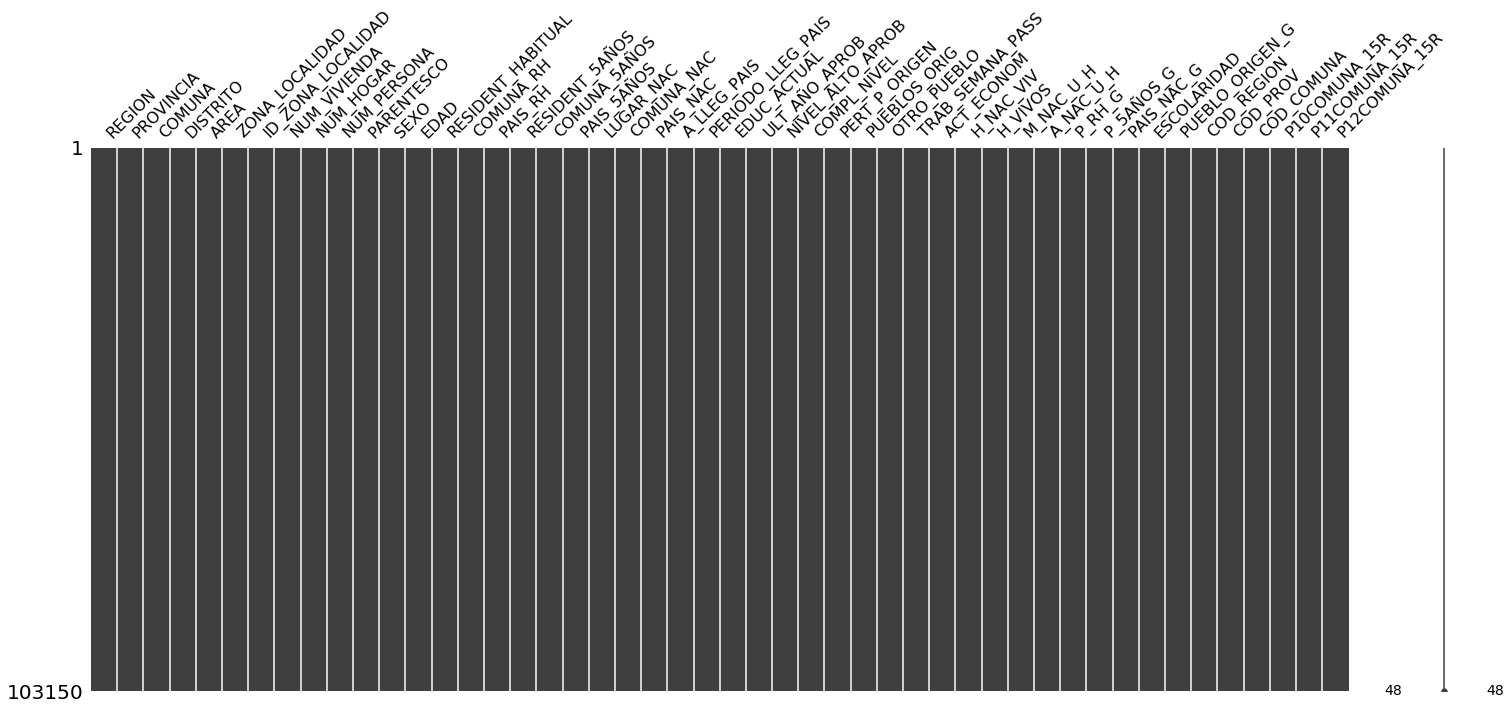

In [39]:
mostrar_nulos(censo_11region)

In [40]:
censo_11region.describe()

,REGION,PROVINCIA,COMUNA,DISTRITO,AREA,ZONA_LOCALIDAD,ID_ZONA_LOCALIDAD,NUM_VIVIENDA,NUM_HOGAR,NUM_PERSONA,...,P_5AÑOS_G,PAIS_NAC_G,ESCOLARIDAD,PUEBLO_ORIGEN_G,COD_REGION,COD_PROV,COD_COMUNA,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R
count,103150.0,103150.000000,103150.000000,103150.000000,103150.000000,103150.000000,103150.000000,103150.000000,103150.000000,103150.000000,...,103150.000000,103150.000000,103150.000000,103150.000000,103150.0,103150.000000,103150.000000,103150.000000,103150.000000,103150.000000
mean,11.0,111.622278,11163.377043,7.698749,1.204169,25.576016,8700.086893,439.987581,1.004867,4.242172,...,985.788977,977.999166,8.676374,70.275385,11.0,111.622278,11163.377043,724.950790,2065.477664,4469.580843
std,0.0,0.873524,87.486056,10.314611,0.403095,133.294042,4688.071563,363.747958,0.090218,17.004855,...,104.578247,133.562158,5.258038,43.724712,0.0,0.873524,87.486056,2539.264357,4219.499025,5336.907877
min,11.0,111.000000,11101.000000,1.000000,1.000000,1.000000,196.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,0.000000,1.000000,11.0,111.000000,11101.000000,98.000000,98.000000,98.000000
25%,11.0,111.000000,11101.000000,1.000000,1.000000,2.000000,5641.000000,121.000000,1.000000,1.000000,...,998.000000,998.000000,4.000000,1.000000,11.0,111.000000,11101.000000,98.000000,98.000000,98.000000
50%,11.0,111.000000,11101.000000,6.000000,1.000000,4.000000,7514.000000,353.000000,1.000000,2.000000,...,998.000000,998.000000,9.000000,98.000000,11.0,111.000000,11101.000000,98.000000,98.000000,98.000000
75%,11.0,112.000000,11201.000000,12.000000,1.000000,7.000000,13402.000000,703.000000,1.000000,3.000000,...,998.000000,998.000000,12.000000,98.000000,11.0,112.000000,11201.000000,98.000000,98.000000,10207.000000
max,11.0,114.000000,11402.000000,99.000000,2.000000,999.000000,15952.000000,1423.000000,7.000000,385.000000,...,998.000000,998.000000,21.000000,98.000000,11.0,114.000000,11402.000000,15101.000000,15201.000000,15101.000000



## **Genere un análisis acabado** para los siguientes temas que se desprenden del CENSO 2017. A modo de ejemplo, puede utilizar alguna de las siguientes variables de interés: Fecundidad, Pueblos indígenas y originarios, Educación, Migración, o rama de actividad económica.

Se requiere que realicen al menos dos “binning” o construcción de rangos en torno a los datos entregados. Hint: Puede apoyarse de función pd.cut. Junto a lo anterior, también se requiere de al menos dos binarizaciones de variables.

Para cada concepto solicitado deberá adjuntar las tablas y gráficos pertinentes junto a las conclusiones que se desprendan del análisis realizado por ud. Para graficar, puede utilizar todas las herramientas vistas en el transcurso del programa (matplotlib y seaborn). Se considerará si el gráfico seleccionado es acorde con el análisis que se presenta además de la creación y utilización de funciones para poder graficar.

En este punto se requerirá de al menos 5 análisis concernientes a los datos. Es decir, no bastará con generar los gráficos, sino que se debe justificar la pertinencia del mismo, y extraer conclusiones relevantes y no evidentes de los mismos. Si se presenta un gráfico que no aporta valor al análisis, este NO será contabilizado.


### **Primer gráfico:** 
será sobre la **Fecundidad**. Para ello usaré un **Binning** sobre las **Etapas fertiles** 
de la mujer y veremos cuantos niñ@s han nacido en un periodo de tiempo.

<img src='https://institutomarques.com/wp-content/uploads/2017/03/dia-de-la-mujer.png' style='width:200px'/> 

Crearé una nueva columna llamada **'ETAPA_FERTIL'** en donde almacenaré las 5 etapas fertiles de la mujer y asi sabré mediante un gráfico cuantos niños nacieron en cada etapa, del año a consultar.

In [41]:
etiquetas_cut= ['Etapa 1 (14-20)','Etapa 2 (21-29)','Etapa 3 (30-36)','Etapa 4 (37-43)','Etapa 5 (44--)']
cutbins = [14,21,30,37,44,np.inf]
censo_11region['ETAPA_FERTIL'] = pd.cut(censo_11region['EDAD'], bins=cutbins, labels=etiquetas_cut)

In [42]:
def graf_uno(year):
    fecundidad=censo_11region[(censo_11region['SEXO']==2)&((censo_11region['H_NAC_VIV']>0)&(censo_11region['H_NAC_VIV']<98))&(censo_11region['A_NAC_U_H']==year)].groupby(['ETAPA_FERTIL'])['H_NAC_VIV'].sum()
    fecundidad.plot(kind='barh',grid=True,figsize=(13,5))
    
    for i, bar in enumerate(fecundidad):
        plt.text(bar,i,f'{bar}',horizontalalignment= 'left',
                fontsize=12, color='r')


    plt.title(f'Cantidad niños nacidos en cada etapa fertil de la mujer \ndel año {year} en la Region de Aysen',fontdict={'fontsize':15})
    plt.ylabel('')
    plt.xlabel('Cant niños Nacidos',fontdict={'fontsize':12});

In [43]:
print('Seleccione año deslizando el boton')
interact(graf_uno, year=(2000,2017));


Seleccione año deslizando el boton


interactive(children=(IntSlider(value=2008, description='year', max=2017, min=2000), Output()), _dom_classes=(…


<!--year=int(input('Ingrese año a graficar: '))
graf_uno(year)-->

En el gráfico anterior. podemos ver la cantidad de **niñ@s nacidos**, segun la **etapa fertil** de la mujer del año consultado

### **Segundo gráfico:**
Para este grafico haré otro **'Binning'** en donde usaré la 'EDAD' nuevamente para saber la cantidad de personas que se encuentra en cada [**Etapa de la vida**](https://eldesarrollocognitivo.com/desarrollo-humano/) y esto lo usaré para saber como esta distribuida la poblacion de pueblos originarios o indigenas. 

|Etapas_Vida |Edades  |
|------------|--------|
|Infancia    |0  - 5  |
|Niñez       |6  - 11 |
|Adolescencia|12 - 19 |
|Juventud    |20 - 24 |
|Adultez     |25 - 59 |
|3° Edad     |60 - 100|

<img src='https://32355306-a-51fa64c4-s-sites.googlegroups.com/a/correo.unimet.edu.ve/fgtce04-07/home/Sin%20t%C3%ADtulo.jpg?attachauth=ANoY7coLhhYQsiiINFrSNOVOiSuVxQb9bbSp38Jn6Co-txxKKumrgmjveACAwt_PRA8kFt7KtRrFEryNX2zL2pnZSISAqM8AkH-d7izEeV6KGAdBTRgT9YyRfUrmfPe6KjZExRRyooPAF8IW2rs2V20Q1ZMP2Pbto8Eq3QFOc87bt7eyrfkpXm9N4g1IxE3zAp2CiUgW6ISfYUIl98XbLO9hl28-EG-Bw-chcWNwKetrVn0DjM4RyxM%3D&attredirects=0' style='width:300px'/> 

In [44]:
etiquetas_cut= ['Infancia 0-5','Niñez 6-11','Adolecencia 12-19','Juventud 20-24','Adultez 25-59','3° Edad 60-100']
cutbins = [0,6,12,20,25,60,np.inf]
censo_11region['ETAPA_VIDA'] = pd.cut(censo_11region['EDAD'], bins=cutbins, labels=etiquetas_cut)

In [45]:
def pueblo(p):
    lista={1:'Mapuche',2:'Aymara',3:'Rapa Nui',4:'Livan Antal',5:'Quechua',6:'Colla',7:'Diaguita',8:'Kewéskar',9:'Yagan o Yamana'}#['Mapuche','Aymara','Rapa Nui','Livan Antal','Quechua','Colla','Diaguita','Kewéskar','Yagan o Yamana']
    PO=censo_11region[censo_11region['PUEBLOS_ORIG']==p].groupby(['ETAPA_VIDA'])['PUEBLOS_ORIG'].sum()
    PO.plot.barh(grid=True,figsize=(15,5))
    for i, bar in enumerate(PO):
            plt.text(bar,i,f'{bar}',horizontalalignment= 'left',
                    fontsize=12, color='r')
    plt.title(f'Distribucion en etapas de la vida de los {lista.get(p)} en la Region de Aysen',fontdict={'fontsize':15})
    plt.ylabel('')
    plt.xlabel('Cant Personas',fontdict={'fontsize':12});
        
def otro_pueblo(op):
#     print('Hola Mundo')
    otralista={3:'Lafquenche',4:'Pehuenche',5:'Huilliche',6:'Picunche',21:'Changos',22:'Chonos',23:'Ona',28:'Tehuelches',33:'Pueblos de america latina',34:'Pueblos resto del mundo',35:'Afrodescendiente',37:'otro pueblo'}
    OP=censo_11region[censo_11region['OTRO_PUEBLO']==op].groupby(['ETAPA_VIDA'])['PUEBLOS_ORIG'].sum()
    OP.plot.barh(grid=True,figsize=(15,5))
    for i, bar in enumerate(OP):
            plt.text(bar,i,f'{bar}',horizontalalignment= 'left',
                    fontsize=12, color='r')
    plt.title(f'Distribucion en etapas de la vida de los {otralista.get(op)} en la Region de Aysen',fontdict={'fontsize':15})
    plt.ylabel('')
    plt.xlabel('Cant Personas',fontdict={'fontsize':12});
    
def elige(graf):
    if graf == 1:
        interact(pueblo,p={'Mapuche':1,'Aymara':2,'Rapa Nui':3,'Livan Antal':4,'Quechua':5,'Colla':6,'Diaguita':7,'Kewéskar':8,'Yagan o Yamana':9});
    elif graf == 2:
        interact(otro_pueblo,op={'Lafquenche':3,'Pehuenche':4,'Huilliche':5,'Picunche':6,'Changos':21,'Chonos':22,'Ona':23,'Tehuelches':28,'Pueblos de america latina':33,'Pueblos resto del mundo':34,'Afrodescendiente':35,'otro pueblo':37});

In [46]:
print('Seleccione Pueblo Originario/Indigena u Otros Pueblos')
interact(elige,graf={'Pueblo Originario/Indigena':1,'Otros Pueblos':2});


Seleccione Pueblo Originario/Indigena u Otros Pueblos


interactive(children=(Dropdown(description='graf', options={'Pueblo Originario/Indigena': 1, 'Otros Pueblos': …

Podemos observar en el gráfico, como esta compuesta la poblacion de los **Pueblos Originarios o Indigenas** segun en que etapa de la vida se encuentran.

### **Tercer gráfico:**
En este tercer gráfico veremos el nivel educacional de los encuestados. 

In [47]:
# censo_11region[censo_11region['PUEBLOS_ORIG']==5].groupby('NIVEL_ALTO_APROB')['PUEBLOS_ORIG'].value_counts().plot.bar(color='r',figsize=(14,8),rot=0)

In [48]:
def pue(pp):
    censo_11region[censo_11region['PUEBLOS_ORIG']==pp].groupby('NIVEL_ALTO_APROB')['PUEBLOS_ORIG'].value_counts().plot.bar(color='r',figsize=(14,8),rot=0)
    plt.xlabel('Educacion Pueblo Originario/Indigena')
    plt.ylabel('Cantidad de personas')
    
interact(pue,pp={'Mapuche':1,'Aymara':2,'Rapa Nui':3,'Livan Antal':4,'Quechua':5,'Colla':6,'Diaguita':7,'Kewéskar':8,'Yagan o Yamana':9,'Otro':10});


interactive(children=(Dropdown(description='pp', options={'Mapuche': 1, 'Aymara': 2, 'Rapa Nui': 3, 'Livan Ant…

In [49]:
censo_11region.columns

Index(['REGION', 'PROVINCIA', 'COMUNA', 'DISTRITO', 'AREA', 'ZONA_LOCALIDAD',
       'ID_ZONA_LOCALIDAD', 'NUM_VIVIENDA', 'NUM_HOGAR', 'NUM_PERSONA',
       'PARENTESCO', 'SEXO', 'EDAD', 'RESIDENT_HABITUAL', 'COMUNA_RH',
       'PAIS_RH', 'RESIDENT_5AÑOS', 'COMUNA_5AÑOS', 'PAIS_5AÑOS', 'LUGAR_NAC',
       'COMUNA_NAC', 'PAIS_NAC', 'A_LLEG_PAIS', 'PERIODO_LLEG_PAIS',
       'EDUC_ACTUAL', 'ULT_AÑO_APROB', 'NIVEL_ALTO_APROB', 'COMPL_NIVEL',
       'PERT_P_ORIGEN', 'PUEBLOS_ORIG', 'OTRO_PUEBLO', 'TRAB_SEMANA_PASS',
       'ACT_ECONOM', 'H_NAC_VIV', 'H_VIVOS', 'M_NAC_U_H', 'A_NAC_U_H',
       'P_RH_G', 'P_5AÑOS_G', 'PAIS_NAC_G', 'ESCOLARIDAD', 'PUEBLO_ORIGEN_G',
       'COD_REGION', 'COD_PROV', 'COD_COMUNA', 'P10COMUNA_15R',
       'P11COMUNA_15R', 'P12COMUNA_15R', 'ETAPA_FERTIL', 'ETAPA_VIDA'],
      dtype='object')

# **Parte 5** -  Herramientas de Análisis


## **Desarrolle un estudio correlacional para los dos set de datos.**
Destaque los coeficientes de Pearson que para ud sean significativos. En base esto, realice un análisis binarizado entre los atributos que presentan una alta correlación. Si es necesario, recodifique las variables que utilizará para la construcción de la matriz (binarizar). Utilice gráficos de dispersión y adjunte un análisis claro que se desprenda de este.


In [ ]:
plt.figure(figsize=(18,6))
mask = np.zeros_like(censo_11region.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(censo_11region.corr(),annot=False,fmt='.3f', mask=mask, cmap='YlOrBr',linewidths=.3);

In [ ]:
plt.figure(figsize=(18,6))
a=censo_11region.corr()
r=a[abs(a>=0.64)]
sns.heatmap(r,annot=False,fmt='.3f', mask=mask, cmap='YlOrBr',linewidths=.3);

In [ ]:
np.where((r<1))

In [ ]:
r.iloc[rrr[0]]